In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Attrition Data.csv")

In [2]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [4]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [5]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

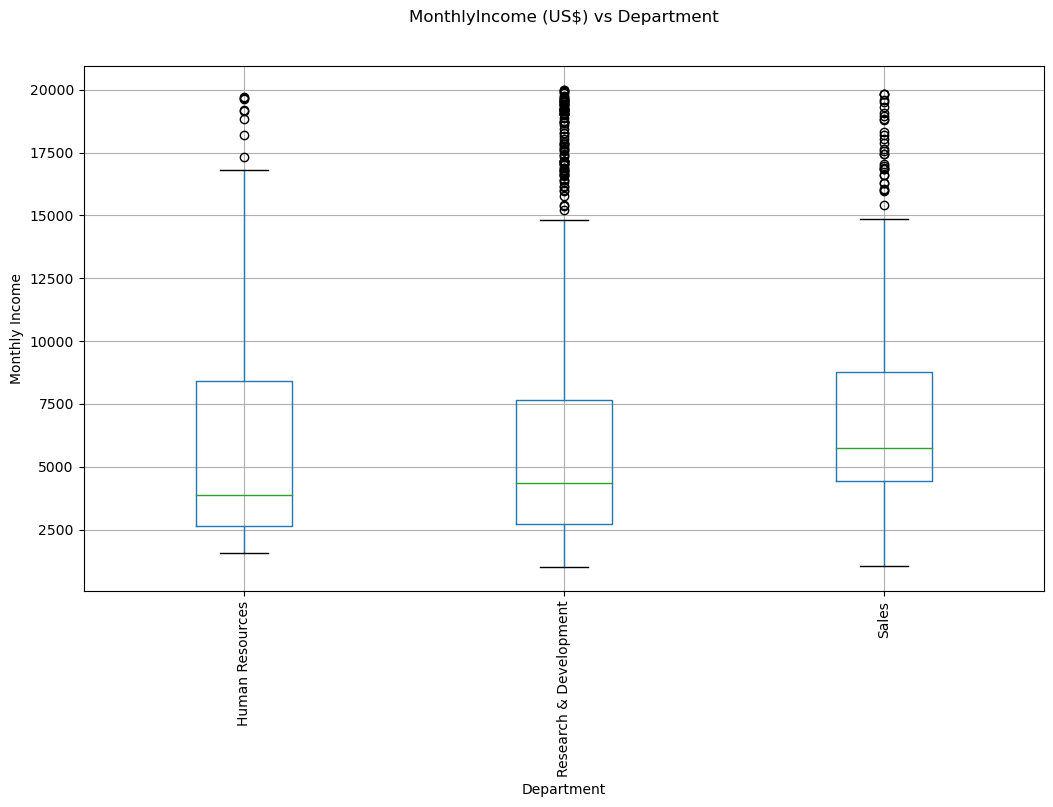

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('MonthlyIncome', 'Department', ax=ax)
plt.suptitle('MonthlyIncome (US$) vs Department')
plt.title('')
plt.ylabel('Monthly Income')
plt.xticks(rotation=90)
plt.show() 


In [7]:
df = df[df["MonthlyIncome"] <= 10000]

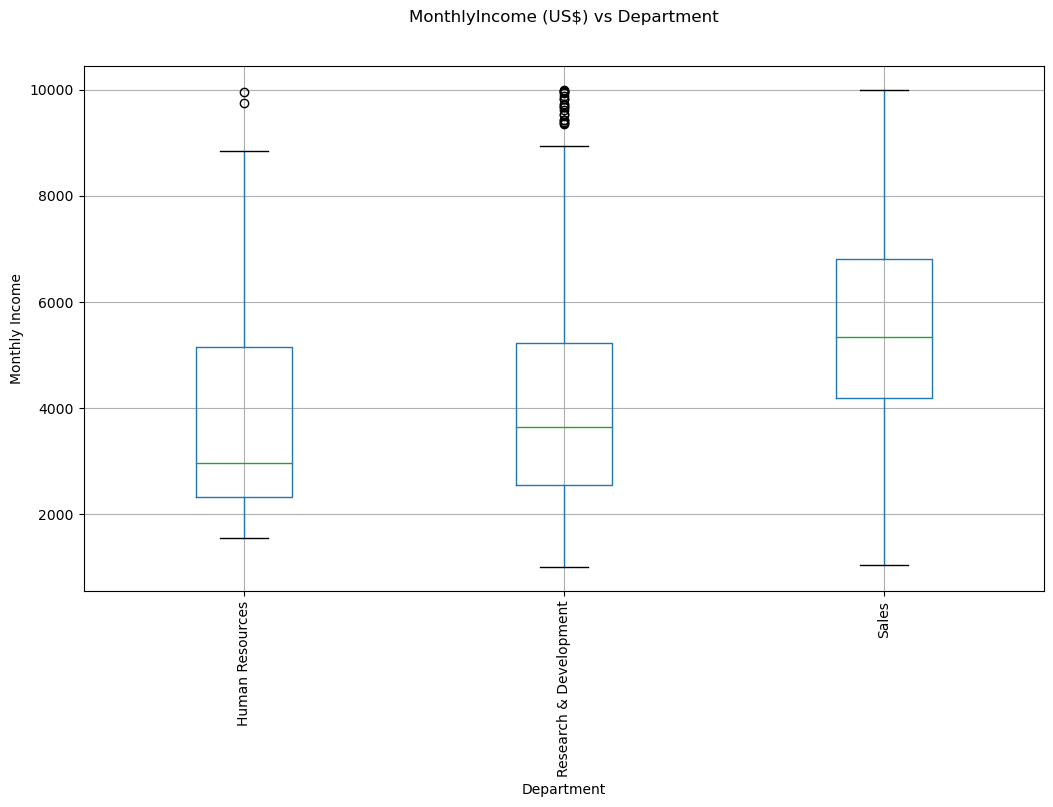

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('MonthlyIncome', 'Department', ax=ax)
plt.suptitle('MonthlyIncome (US$) vs Department')
plt.title('')
plt.ylabel('Monthly Income')
plt.xticks(rotation=90)
plt.show() 

In [9]:
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EducationField'] = le_education.fit_transform(df['EducationField'])
df["EducationField"].unique()


array([1, 4, 3, 2, 5, 0])

In [11]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,1,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,1,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,4,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,1,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,3,1,2,Married,3468,9,3,2


In [12]:
df['Attrition'].value_counts()

No     977
Yes    212
Name: Attrition, dtype: int64

In [13]:
#accuracy if model guessed no all the time
(977 - 212)/977

0.7830092118730808

<AxesSubplot:xlabel='Age', ylabel='count'>

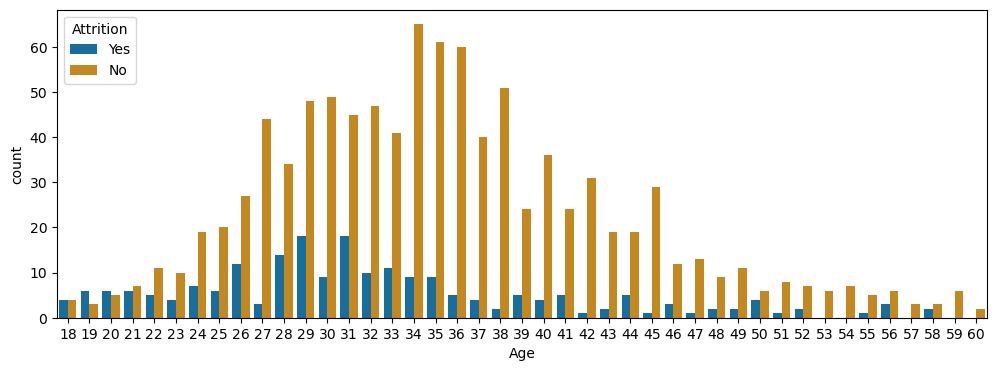

In [14]:
#show number of employees that left and stayed by age
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data = df, palette = 'colorblind')

In [18]:
for c in df.columns:
    if df[c].dtype == object:
        print(str(c) + ' : ' + str(df[c].unique()))
        print(df[c].value_counts())
        print('________________________')

Attrition : ['Yes' 'No']
No     977
Yes    212
Name: Attrition, dtype: int64
________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    769
Sales                     370
Human Resources            50
Name: Department, dtype: int64
________________________
MaritalStatus : ['Single' 'Married' 'Divorced']
Married     529
Single      406
Divorced    254
Name: MaritalStatus, dtype: int64
________________________


In [19]:
#Get the correlation
df.corr()

,Age,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,0.002124,0.216845,-0.054259,0.002249,0.002361,0.223226,0.283746,-0.012218,0.191121
DistanceFromHome,0.002124,1.000000,0.000623,0.013713,-0.023087,0.010460,0.037078,-0.014628,-0.049783,0.048369
Education,0.216845,0.000623,1.000000,-0.042775,-0.013514,0.000414,0.115048,0.123601,0.008744,0.071488
EducationField,-0.054259,0.013713,-0.042775,1.000000,0.045134,-0.048816,-0.054487,-0.010739,0.036482,0.009673
EnvironmentSatisfaction,0.002249,-0.023087,-0.013514,0.045134,1.000000,-0.000084,-0.007460,0.011713,0.021524,0.007825
JobSatisfaction,0.002361,0.010460,0.000414,-0.048816,-0.000084,1.000000,0.001884,-0.045939,-0.018767,0.019540
MonthlyIncome,0.223226,0.037078,0.115048,-0.054487,-0.007460,0.001884,1.000000,0.080092,0.026682,0.335679
NumCompaniesWorked,0.283746,-0.014628,0.123601,-0.010739,0.011713,-0.045939,0.080092,1.000000,0.002588,-0.170676
WorkLifeBalance,-0.012218,-0.049783,0.008744,0.036482,0.021524,-0.018767,0.026682,0.002588,1.000000,-0.001856
YearsAtCompany,0.191121,0.048369,0.071488,0.009673,0.007825,0.019540,0.335679,-0.170676,-0.001856,1.000000


In [15]:
#transform all data to numeric

from sklearn.preprocessing import LabelEncoder
le_department = LabelEncoder()
df['Department'] = le_department.fit_transform(df['Department'])
df["Department"].unique()

array([2, 1, 0])

In [16]:
from sklearn.preprocessing import LabelEncoder
le_attrition = LabelEncoder()
df['Attrition'] = le_attrition.fit_transform(df['Attrition'])
df["Attrition"].unique()

array([1, 0])

In [17]:
#Label Encoder for Marital Status

from sklearn.preprocessing import LabelEncoder
le_marital = LabelEncoder()
df['MaritalStatus'] = le_marital.fit_transform(df['MaritalStatus'])
df["MaritalStatus"].unique()


array([2, 1, 0])

In [25]:
#ALL CONVERTED TO NUMERIC
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2


<AxesSubplot:>

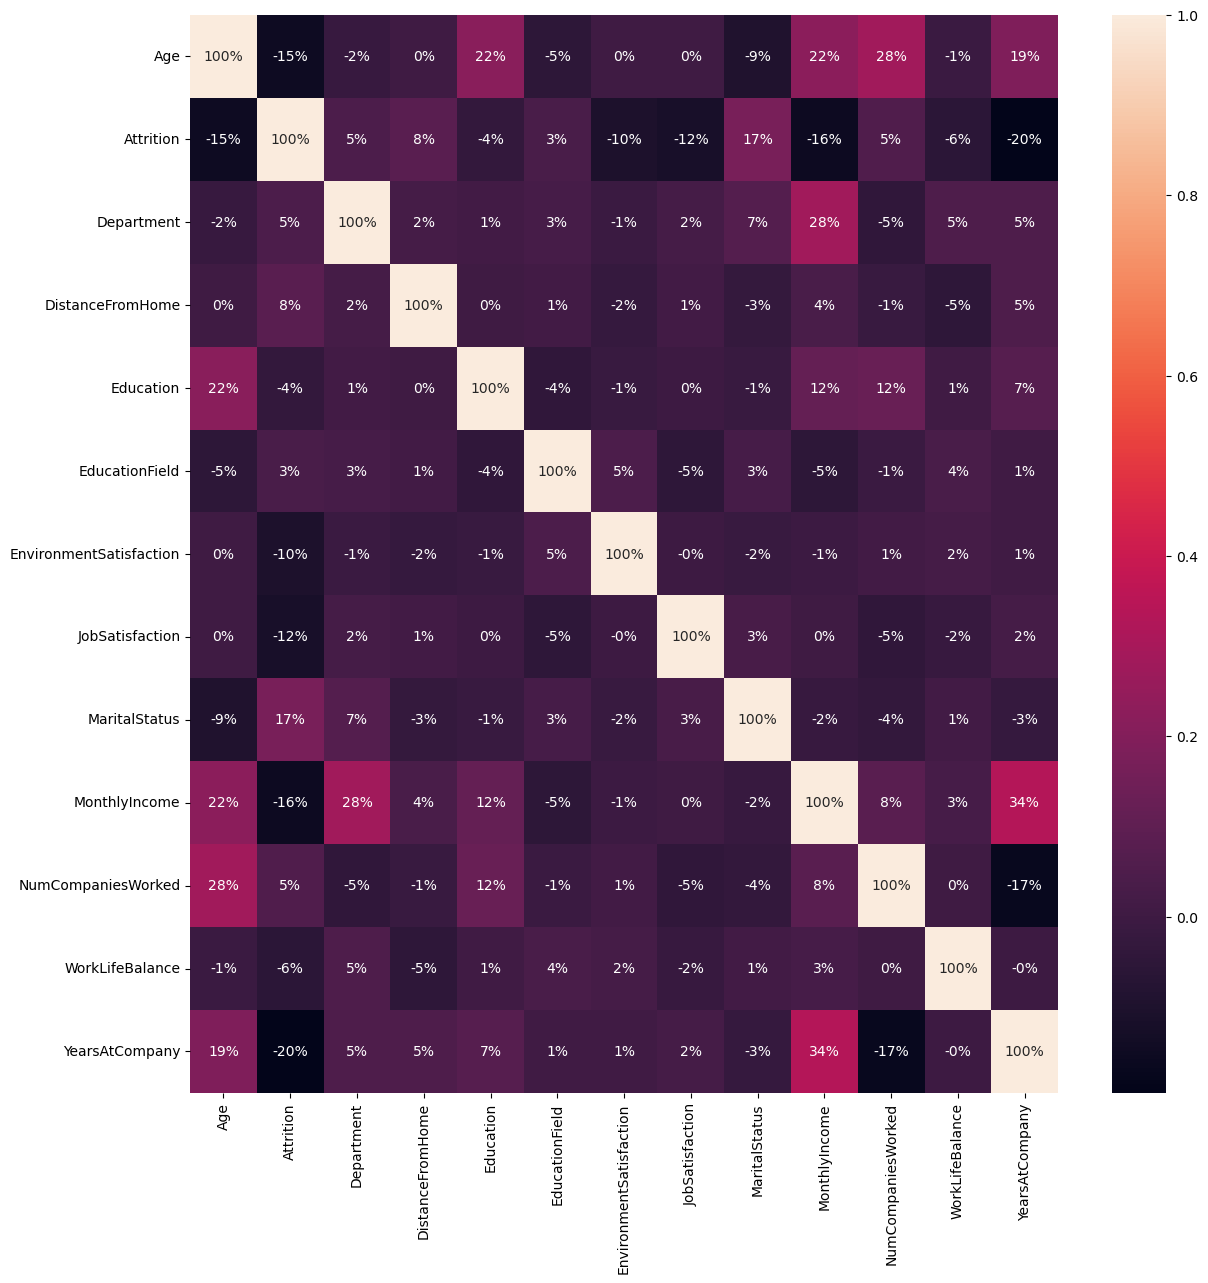

In [26]:
#Highest Correlation with Attrition
#YearsAtCompany -20
#Use this for avg years at last companies?

#Marital Status 17

#MonthlyIncome -16
#monthly income offered 

#Age -15

#DistanceFromHome 8
#Department, NumCompaniesWorked 5

#Education -4
#EducationField 3

#Iffy Columns
#JobSatisfaction -12
#EnvironmentSatisfaction -10

plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt = '.0%')

<AxesSubplot:>

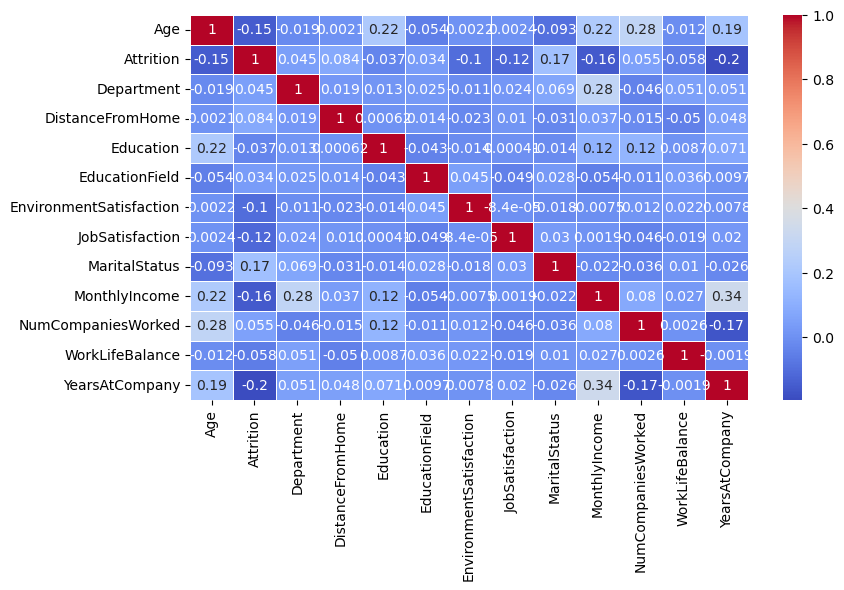

In [18]:
#HEATMAP
import seaborn as sns

plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, cmap='coolwarm')

In [20]:
#Select the columns i want
df = df[["Age", "Attrition", "Department", "YearsAtCompany", "MaritalStatus", "EducationField", "MonthlyIncome", "NumCompaniesWorked"]]
df.head()

,Age,Attrition,Department,YearsAtCompany,MaritalStatus,EducationField,MonthlyIncome,NumCompaniesWorked
0,41,1,2,6,2,1,5993,8
1,49,0,1,10,1,1,5130,1
2,37,1,1,0,2,4,2090,6
3,33,0,1,8,1,1,2909,1
4,27,0,1,2,1,3,3468,9


In [21]:
df.describe()

,Age,Attrition,Department,Education,EducationField,MonthlyIncome,NumCompaniesWorked
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,34.866274,0.178301,1.269134,2.882254,2.252313,4535.847771,2.513036
std,8.224017,0.382927,0.530133,1.023921,1.339099,2114.622229,2.453104
min,18.000000,0.000000,0.000000,1.000000,0.000000,1009.000000,0.000000
25%,29.000000,0.000000,1.000000,2.000000,1.000000,2703.000000,1.000000
50%,34.000000,0.000000,1.000000,3.000000,2.000000,4257.000000,1.000000
75%,40.000000,0.000000,2.000000,4.000000,3.000000,5772.000000,4.000000
max,60.000000,1.000000,2.000000,5.000000,5.000000,9998.000000,9.000000


In [21]:
Y = df['Attrition']

In [22]:
#In the dataset, how many employees committed attrition
Y.value_counts()

0    977
1    212
Name: Attrition, dtype: int64

In [23]:
df = df.drop(columns = ['Attrition'])

In [33]:
#Balance attrition rate above

In [26]:
#Split Data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
Train_x, Test_x, Train_y, Test_y = train_test_split(df, Y, test_size = 0.67, random_state = 0)

In [27]:

#Recursive Feature Elimination (RFE) is based on the idea to repeatedly 
#construct a model and choose either the best or worst performing feature, 
#setting the feature aside and then repeating the process with the rest of 
#the features. This process is applied until all features in the dataset 
#are exhausted. The goal of RFE is to select features by recursively 
#considering smaller and smaller sets of features.

#data_final_vars=data_final.columns.values.tolist()
#y=['y']
#X=[i for i in data_final_vars if i not in y]
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
#rfe = RFE(logreg, 20)
#rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)


from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(Train_x, Train_y.values)

LogisticRegression()

In [44]:
# predict class labels for the test set
predict = reg.predict(Test_x)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(reg.score(Test_x, Test_y)))
print (predict)

Accuracy of logistic regression classifier on test set: 0.83
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [29]:
# generate class probabilities
probs = reg.predict_proba(Test_x)
print (probs)

[[0.78122208 0.21877792]
 [0.8544268  0.1455732 ]
 [0.90934462 0.09065538]
 ...
 [0.43563056 0.56436944]
 [0.82529318 0.17470682]
 [0.35520704 0.64479296]]


In [33]:
df.head()

,Age,Department,YearsAtCompany,MaritalStatus,EducationField,MonthlyIncome,NumCompaniesWorked
0,41,2,6,2,1,5993,8
1,49,1,10,1,1,5130,1
2,37,1,0,2,4,2090,6
3,33,1,8,1,1,2909,1
4,27,1,2,1,3,3468,9


In [34]:
#TEST WITH INPUT

import numpy as np
x = np.array([[21, 'Sales', 2, 'Single', 'Life Sciences', 10000, 5]])

In [35]:
x[:, 1] = le_department.transform(x[:,1])
x[:, 3] = le_marital.transform(x[:,3])
x[:, 4] = le_education.transform(x[:,4])

x = x.astype(float)

In [36]:
x

array([[2.1e+01, 2.0e+00, 2.0e+00, 2.0e+00, 1.0e+00, 1.0e+04, 5.0e+00]])

In [37]:
y_pred = reg.predict_proba(np.array(x))
y_pred

C:\Users\arthu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.41531871, 0.58468129]])

In [39]:
import pickle

In [40]:
data = {"model": reg, "le_education": le_education, "le_department": le_department, "le_attrition": le_attrition, "le_marital": le_marital}
with open('saved_steps.pkl', 'wb') as file:
	pickle.dump(data, file)

In [41]:

with open('saved_steps.pkl', 'rb') as file:
	data = pickle.load(file)

regressor_loaded = data["model"]
le_education = data["le_education"]
le_department = data["le_department"]
le_attrition = data["le_attrition"]
le_marital = data["le_marital"]

In [42]:
y_pred = regressor_loaded.predict_proba(x)
y_pred

#probability is 22.8%

C:\Users\arthu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.41531871, 0.58468129]])

In [35]:
#LINEAR REGRESSION Model training


#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#reg.fit(Train_x, Train_y.values)

In [79]:
#predict = reg.predict(Test_x)

In [49]:
#y_pred = reg.predict(x)
#y_pred

C:\Users\arthu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [43]:
#Checking the accuracy

from sklearn.metrics import accuracy_score
accuracy_score(Test_y, predict)

0.8306148055207027

In [107]:
#Show confusion matrix and accuracy score for model on test data
#Format is |TP FP|
#          |FN TN|

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Test_y, predict)

print(cm)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [108]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators= 300, random_state= 20).fit(Train_x,Train_y)
forest_pred = forest.predict(Test_x)

In [109]:
# Accuracy of random forest

accuracy_score(Test_y, forest_pred)

0.8117647058823529

In [110]:
# Confusion Matrix
confu_mat = confusion_matrix(Test_y, forest_pred)
print(confu_mat)

[[472  21]
 [ 91  11]]


In [ ]:
#testing random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state= 0)
forest.fit(Train_x, Train_y)

In [ ]:
forest.score(Train_x, Train_y)

In [ ]:

# Confusion Matrix and accuracy score
#Format is |TP FP|
#          |FN TN|
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_y, forest.predict(Test_x))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Accuracy = {}'.format( (TP + TN) / (TP + TN + FN + FP)  ))

C:\Users\arthu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.24065986])